In [1]:
import pandas as pd 
import sklearn.datasets as skdt
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = skdt.load_boston()
df_data = pd.DataFrame(data.data, columns=data.feature_names)

C:\Users\PC-10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [4]:
df_data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
#mendapatkan array
points_linkage = df_data.iloc[:,[2,5]].values
points_complete = df_data.iloc[:,[2,6]].values

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage, complete

In [9]:
hr_linkage = linkage(points_linkage, method='ward')
hr_complete = complete(points_complete)

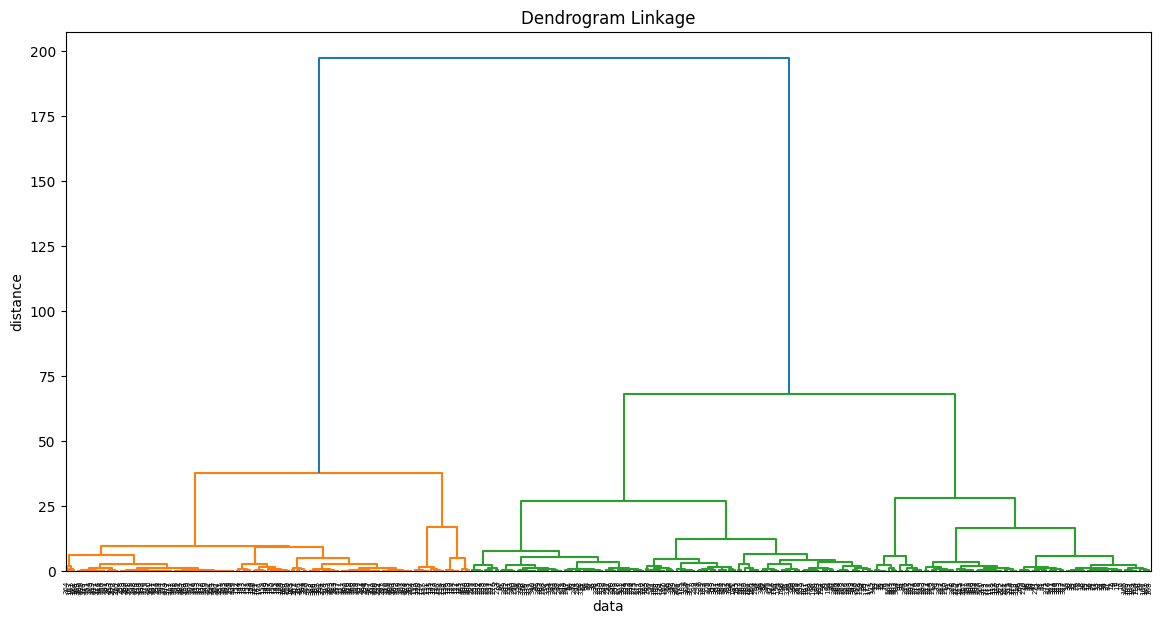

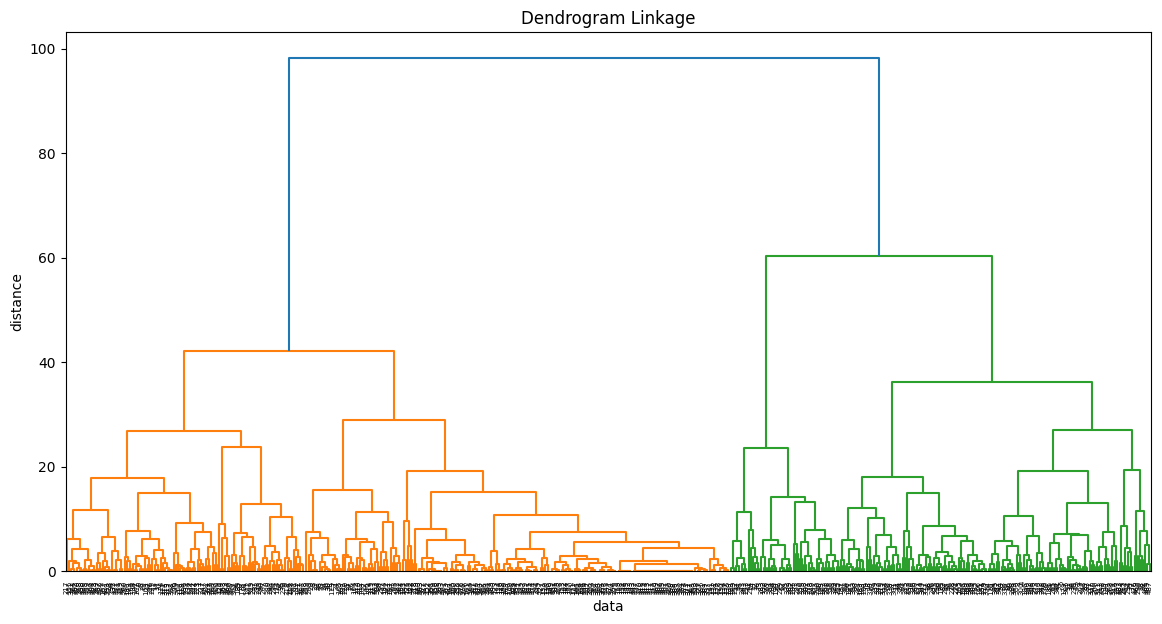

In [11]:
plt.figure(1, figsize=(14,7))
dendrogram(hr_linkage)
plt.title('Dendrogram Linkage')
plt.xlabel('data')
plt.ylabel('distance')

plt.figure(2, figsize=(14,7))
dendrogram(hr_complete)
plt.title('Dendrogram Linkage')
plt.xlabel('data')
plt.ylabel('distance')
plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
ag_linkage = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
ag_complete = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [15]:
#training model
pr_linkage = ag_linkage.fit_predict(points_linkage)
pr_complete = ag_linkage.fit_predict(points_linkage)

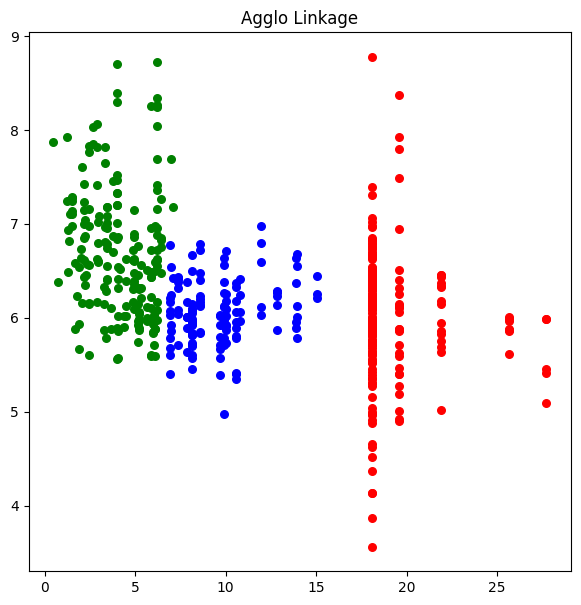

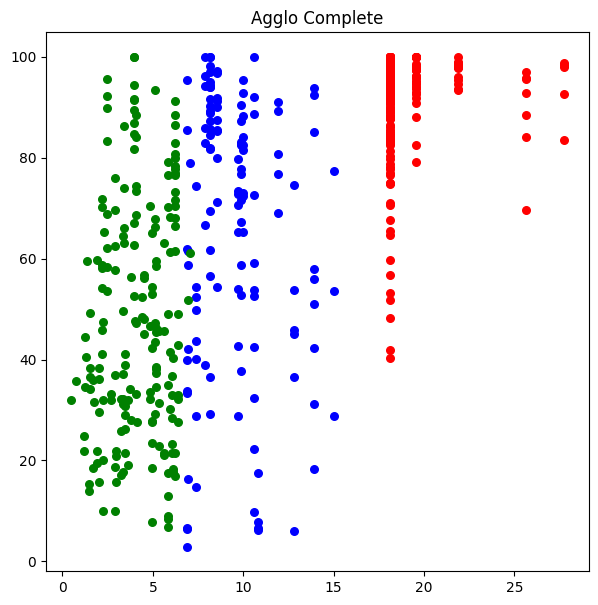

In [19]:
plt.figure(1, figsize=(7,7))
plt.scatter(points_linkage[pr_linkage==0,0],points_linkage[pr_linkage==0,1],s= 30, c='red')
plt.scatter(points_linkage[pr_linkage==1,0],points_linkage[pr_linkage==1,1],s= 30, c='blue')
plt.scatter(points_linkage[pr_linkage==2,0],points_linkage[pr_linkage==2,1],s= 30, c='green')
plt.title('Agglo Linkage')

plt.figure(2, figsize=(7,7))
plt.scatter(points_complete[pr_complete==0,0],points_complete[pr_complete==0,1],s= 30, c='red')
plt.scatter(points_complete[pr_complete==1,0],points_complete[pr_complete==1,1],s= 30, c='blue')
plt.scatter(points_complete[pr_complete==2,0],points_complete[pr_complete==2,1],s= 30, c='green')
plt.title('Agglo Complete')

plt.show()